## MDVR-KCL experiments using the segmented wav files. (10 selected features)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import auc
#from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [3]:
# only acoustic features
df = pd.read_csv("../MDVR_all_features_chunks.csv")
#df = shuffle(df)
#df.reset_index(inplace=True, drop=True)
df.drop(['voiceID', 'label_x'], inplace = True, axis = 1)
df.rename(columns={'label_y':'label'}, inplace=True)

df['label'].value_counts()
df.head()

len(df)

816

In [4]:
#drop rows wth na
df = df.dropna()
len(df)
df

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,231.250953,45.480073,16.525302,0.027821,0.000121,0.011726,0.011947,0.085180,0.922601,0.028993,...,24.552747,-20.110619,-94.736717,-55.245548,-2.910492,-22.578827,-8.833281,4.481475,-7.786104,0
1,201.477299,14.236377,18.961886,0.014327,0.000071,0.006781,0.007266,0.075751,0.843053,0.021091,...,55.259625,-9.692891,-87.940073,-53.553243,-15.094735,-5.031696,1.086642,12.303356,-6.256570,0
2,209.285317,29.051820,12.840174,0.029609,0.000143,0.013380,0.009806,0.078756,0.813759,0.028769,...,50.166589,27.302583,-78.536637,-88.946175,-17.807079,-26.052948,4.212388,15.374215,-22.268039,0
3,221.819604,31.556270,16.250999,0.027461,0.000123,0.012908,0.015317,0.088893,0.941172,0.033405,...,34.791814,-3.472786,-99.235397,-67.622613,0.790294,-12.970583,2.264660,1.247783,-29.259117,0
4,199.675876,6.519508,14.700531,0.026505,0.000134,0.014263,0.016973,0.078197,0.684674,0.030303,...,-1.658086,-28.638360,-119.038394,-29.546933,35.435261,-17.023488,-14.687500,16.904188,9.033225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,195.347573,3.898871,16.031184,0.015449,0.000079,0.007649,0.009837,0.105253,1.159898,0.030603,...,-19.489413,36.202501,-12.024058,-31.619932,-27.050083,0.008420,-2.687716,-36.327416,-7.040984,1
812,202.670234,19.536584,16.369083,0.015260,0.000076,0.007204,0.006306,0.054645,0.518385,0.020535,...,7.578952,35.383236,-21.173209,-39.841536,-47.107387,1.869901,10.608157,-5.297793,-22.543747,1
813,186.407006,14.370029,15.624512,0.021293,0.000114,0.011290,0.010155,0.066981,0.627914,0.029828,...,40.402198,39.211555,-33.991202,-31.252842,-36.273257,-5.828548,19.337134,-11.712576,-29.476929,1
814,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.063512,0.622949,0.024778,...,12.883081,28.696040,-27.721696,-25.856546,-38.773029,7.435858,17.053259,-9.497502,-19.095361,1


In [5]:
#separate dependent and independent variable for acoustic features only
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1]
df_Y = df.iloc[:,-1]

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)
X

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature3,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12
0,231.250953,45.480073,16.525302,0.027821,0.000121,0.011726,0.011947,0.085180,0.922601,0.028993,...,69.157752,24.552747,-20.110619,-94.736717,-55.245548,-2.910492,-22.578827,-8.833281,4.481475,-7.786104
1,201.477299,14.236377,18.961886,0.014327,0.000071,0.006781,0.007266,0.075751,0.843053,0.021091,...,71.862204,55.259625,-9.692891,-87.940073,-53.553243,-15.094735,-5.031696,1.086642,12.303356,-6.256570
2,209.285317,29.051820,12.840174,0.029609,0.000143,0.013380,0.009806,0.078756,0.813759,0.028769,...,73.061485,50.166589,27.302583,-78.536637,-88.946175,-17.807079,-26.052948,4.212388,15.374215,-22.268039
3,221.819604,31.556270,16.250999,0.027461,0.000123,0.012908,0.015317,0.088893,0.941172,0.033405,...,61.590851,34.791814,-3.472786,-99.235397,-67.622613,0.790294,-12.970583,2.264660,1.247783,-29.259117
4,199.675876,6.519508,14.700531,0.026505,0.000134,0.014263,0.016973,0.078197,0.684674,0.030303,...,22.476925,-1.658086,-28.638360,-119.038394,-29.546933,35.435261,-17.023488,-14.687500,16.904188,9.033225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,195.347573,3.898871,16.031184,0.015449,0.000079,0.007649,0.009837,0.105253,1.159898,0.030603,...,37.965771,-19.489413,36.202501,-12.024058,-31.619932,-27.050083,0.008420,-2.687716,-36.327416,-7.040984
812,202.670234,19.536584,16.369083,0.015260,0.000076,0.007204,0.006306,0.054645,0.518385,0.020535,...,18.847136,7.578952,35.383236,-21.173209,-39.841536,-47.107387,1.869901,10.608157,-5.297793,-22.543747
813,186.407006,14.370029,15.624512,0.021293,0.000114,0.011290,0.010155,0.066981,0.627914,0.029828,...,28.429428,40.402198,39.211555,-33.991202,-31.252842,-36.273257,-5.828548,19.337134,-11.712576,-29.476929
814,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.063512,0.622949,0.024778,...,39.590882,12.883081,28.696040,-27.721696,-25.856546,-38.773029,7.435858,17.053259,-9.497502,-19.095361


               Features       Score
0              meanF0Hz  103.037050
13        mfcc_feature2   67.490052
4   localabsoluteJitter   65.093907
14        mfcc_feature3   55.174963
17        mfcc_feature6   50.736051
15        mfcc_feature4   46.564766
1             stdevF0Hz   32.165986
22       mfcc_feature11   26.873401
16        mfcc_feature5   14.847152
12        mfcc_feature1   11.250375


Text(0, 0.5, 'f-test score')

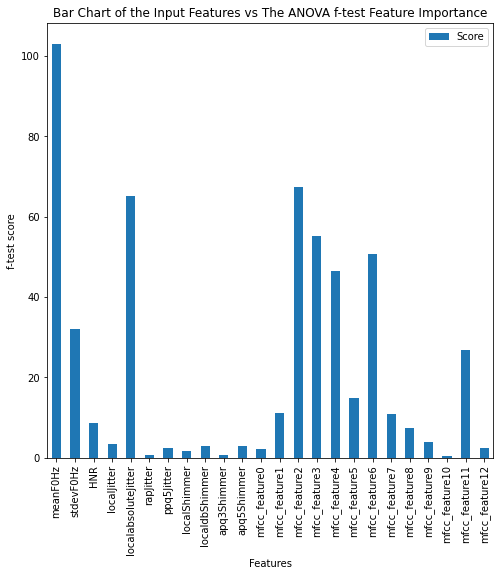

In [6]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores.sort_values(["Score"],ascending=False)


featureScores.plot.bar(x='Features', y='Score', figsize=(8,8))
plt.title("Bar Chart of the Input Features vs The ANOVA f-test Feature Importance")
plt.ylabel("f-test score")

In [7]:
X_train = X_train[['meanF0Hz', 'mfcc_feature2', 'localabsoluteJitter', 'mfcc_feature3', 'mfcc_feature6', 'mfcc_feature4','stdevF0Hz','mfcc_feature11','mfcc_feature5','mfcc_feature1']]

X_test= X_test[['meanF0Hz', 'mfcc_feature2', 'localabsoluteJitter', 'mfcc_feature3', 'mfcc_feature6', 'mfcc_feature4','stdevF0Hz','mfcc_feature11','mfcc_feature5','mfcc_feature1']]


In [8]:
# Scale for acoustic features
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.154648,0.846517,0.065681,0.743756,0.667090,0.579216,0.012578,0.489025,0.631875,0.770619
1,0.359383,0.298719,0.118045,0.506395,0.515593,0.560750,0.138233,0.339576,0.483156,0.607753
2,0.266854,0.601740,0.082628,0.626660,0.612244,0.534571,0.158108,0.311654,0.539082,0.559858
3,0.989576,0.344444,0.253371,0.934991,0.826577,0.689354,0.300506,0.766656,0.835076,0.161267
4,0.492156,0.417406,0.159527,0.573677,0.621597,0.574552,0.149232,0.536267,0.680521,0.186301
...,...,...,...,...,...,...,...,...,...,...
560,0.274639,0.773143,0.129217,0.781331,0.574649,0.612277,0.178036,0.157351,0.470565,0.591572
561,0.179311,0.491910,0.250382,0.751410,0.658546,0.509658,0.269568,0.461749,0.561152,0.507251
562,0.079025,0.435423,0.186168,0.550999,0.702464,0.751190,0.059888,0.266940,0.779632,0.567068
563,0.144036,0.719242,0.206145,0.667544,0.686575,0.759388,0.093019,0.427940,0.649174,0.803719


In [9]:
###### KNNN ###########
# Fit classifier to the Training set
#KNN
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print("Classification Accuracy: ", accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

Classification Accuracy:  81.06995884773663
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.82      0.73      0.77       106

    accuracy                           0.81       243
   macro avg       0.81      0.80      0.80       243
weighted avg       0.81      0.81      0.81       243

0.8011637515493734
[1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0]
[[120  17]
 [ 29  77]]


In [10]:
#### SVM
import matplotlib.pyplot as plt
model_svm = svm.SVC()
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm = ((conf_matrix_svm[0,0] + conf_matrix_svm[1,1])/(conf_matrix_svm[0,0] +conf_matrix_svm[0,1]+conf_matrix_svm[1,0]+conf_matrix_svm[1,1]))*100


print("Classification Accuracy: ", accuracy_svm)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm))

print(y_pred_svm)

print(conf_matrix_svm)

Classification Accuracy:  72.8395061728395
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       137
           1       0.76      0.56      0.64       106

    accuracy                           0.73       243
   macro avg       0.74      0.71      0.71       243
weighted avg       0.73      0.73      0.72       243

0.7089588210990223
[0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
[[118  19]
 [ 47  59]]


In [11]:
####Decision Tree
import matplotlib.pyplot as plt
model_dt = tree.DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt = ((conf_matrix_dt[0,0] + conf_matrix_dt[1,1])/(conf_matrix_dt[0,0] +conf_matrix_dt[0,1]+conf_matrix_dt[1,0]+conf_matrix_dt[1,1]))*100


print("Classification Accuracy: ", accuracy_dt)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_dt)

print(conf_matrix_dt)

Classification Accuracy:  72.42798353909465
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.82      0.73      0.77       106

    accuracy                           0.81       243
   macro avg       0.81      0.80      0.80       243
weighted avg       0.81      0.81      0.81       243

0.8011637515493734
[0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0]
[[102  35]
 [ 32  74]]


In [12]:
####Niaves Bayes
model_nb = GaussianNB()
model_nb = model_nb.fit(X_train, y_train)


y_pred_nb = model_nb.predict(X_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_nb = ((conf_matrix_nb[0,0] + conf_matrix_nb[1,1])/(conf_matrix_nb[0,0] +conf_matrix_nb[0,1]+conf_matrix_nb[1,0]+conf_matrix_nb[1,1]))*100


print("CLassifictaion Accuracy:", accuracy_nb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_nb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_nb))

print(y_pred_nb)

print(conf_matrix_nb)


CLassifictaion Accuracy: 67.90123456790124
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       137
           1       0.65      0.57      0.61       106

    accuracy                           0.68       243
   macro avg       0.67      0.67      0.67       243
weighted avg       0.68      0.68      0.68       243

0.6662305467566452
[0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
[[105  32]
 [ 46  60]]


In [13]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf = ((conf_matrix_rf[0,0] + conf_matrix_rf[1,1])/(conf_matrix_rf[0,0] +conf_matrix_rf[0,1]+conf_matrix_rf[1,0]+conf_matrix_rf[1,1]))*100


print("CLassification Accuracy: ", accuracy_rf)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_rf))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_rf))

print(y_pred_rf)

print(conf_matrix_rf)

CLassification Accuracy:  77.36625514403292
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       137
           1       0.79      0.66      0.72       106

    accuracy                           0.77       243
   macro avg       0.78      0.76      0.76       243
weighted avg       0.78      0.77      0.77       243

0.7608456135518524
[1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
[[118  19]
 [ 36  70]]


In [14]:
pd.DataFrame
data = {'ML Alg':['KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
        'Accuracy':[accuracy_knn, accuracy_svm, accuracy_dt, accuracy_nb, accuracy_rf]}
  
# Create DataFrame
df_results = pd.DataFrame(data)
df_results

,ML Alg,Accuracy
0,KNN,81.069959
1,SVM,72.839506
2,Decision Tree,72.427984
3,Naive Bayes,67.901235
4,Random Forest,77.366255


#### K fold evaluation

In [15]:
df_selected = df[['meanF0Hz', 'mfcc_feature2', 'localabsoluteJitter', 'mfcc_feature3', 'mfcc_feature6', 'mfcc_feature4','stdevF0Hz','mfcc_feature11','mfcc_feature5','mfcc_feature1', 'label']]

In [16]:
def kfold_eval(alg):
    df_X = df_selected.iloc[:, :-1].values
    df_Y = df_selected.iloc[:,-1].values
    
    df_X = pd.DataFrame(df_X)
    df_Y = pd.DataFrame(df_Y)

    parts = 6
    kfold = KFold(parts, shuffle=True)
    
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    precision_list =[]
    f1_knn_list = []
    
    for i in range(1, 11):
        accuracy_total = 0
        sensitivity_total =0
        specificity_total=0
        precision_total=0
        f1_knn_total=0
        
        for train, test in kfold.split(df_X,df_Y):
            Xtrain = df_X.iloc[train, :]
            #print(Xtrain)
            Ytrain = df_Y.iloc[train, :]
            #print(Ytrain)
            Xtest = df_X.iloc[test, :]
            Ytest = df_Y.iloc[test, :]
            #scale
            sc = MinMaxScaler()
            Xtrain = sc.fit_transform(Xtrain)
            Xtest = sc.transform(Xtest)
            
            #modelling
            if (alg == "LR"):
                model = LogisticRegression()
            elif (alg == "GB"):
                model = GradientBoostingClassifier(learning_rate= 0.5, max_depth=1,n_estimators=3)
            elif (alg == "KNN"):
                model = KNeighborsClassifier(n_neighbors = 10)
            elif (alg == "SVM"):
                model = svm.SVC()
            elif (alg == "DT"):
                model = tree.DecisionTreeClassifier()
            elif (alg == "NB"):
                model =  GaussianNB()
            elif (alg == "RF"):
                model = RandomForestClassifier()
                
            model.fit(Xtrain, Ytrain)
            y_pred = model.predict(Xtest)

            conf_matrix = confusion_matrix(Ytest, y_pred)
            #print(conf_matrix)
            TN = conf_matrix[0][0]
            FP = conf_matrix[0][1]
            FN = conf_matrix[1][0]
            TP = conf_matrix[1][1]
            #print(TN, ", ", FP, ", ", FN, ", ", TP)

            accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
            sensitivity = (TP/(TP+FN)) * 100 #recall
            specificity = (TN/(TN + FP)) * 100
            precision = (TP/(TP+FP)) * 100
            f1_knn = 2 *((sensitivity * precision)/(sensitivity + precision))
            
            #sum it up
            accuracy_total += accuracy
            sensitivity_total += sensitivity
            specificity_total += specificity
            precision_total += precision
            f1_knn_total += f1_knn
            
            #avg
            accuracy_mean = accuracy_total/parts
            sensitivity_mean = sensitivity_total/parts
            specificity_mean = specificity_total/parts
            precision_mean = precision_total/parts
            f1_mean = f1_knn_total/parts
            
        #print("Loop ", i, "\n Mean Accuracy: ", accuracy_total/parts,
                           #  "\n Mean sensitivity: ",sensitivity_total/parts,
                            # "\n Mean Specificity: ", specificity_total/parts,
                             #"\n Mean Precision: ",precision_total/parts,
                             #"\n Mean f1: ",f1_knn_total/parts)
        accuracy_list.append(accuracy_mean)
        sensitivity_list.append(sensitivity_mean)
        specificity_list.append(specificity_mean)
        precision_list.append(precision_mean)
        f1_knn_list.append(f1_mean)
        
    print(alg)
    print("Accuracy for the 10 iterations: ",  accuracy_list) #mean accuracy acros the 6 folds for each iteration
    print("Average accuracy: ", np.mean(accuracy_list), "\n")
    
    print("Sensitivity for the 10 iterations: ",  sensitivity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average sensitivity: ", np.mean(sensitivity_list), "\n")
        
    print("Specificity for the 10 iterations: ",  specificity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average specificity: ", np.mean(specificity_list), "\n")
    
    print("Precision for the 10 iterations: ",  precision_list) 
    print("Average precision: ", np.mean(precision_list), "\n")
    
    print("F1  score for the 10 iterations: ",  f1_knn_list) 
    print("Average f1 score: ", np.mean(f1_knn_list), "\n")
       
    
        
    

In [17]:
kfold_eval("KNN")

print("\n")
kfold_eval("DT")

print("\n")
kfold_eval("SVM")

print("\n")
kfold_eval("NB")

print("\n")
kfold_eval("LR")

print("\n")
kfold_eval("GB")

print("\n")
kfold_eval("RF")

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

KNN
Accuracy for the 10 iterations:  [84.89957619310853, 84.1588354523678, 85.88907315275475, 84.53012714206744, 85.26718260549106, 84.65266261286162, 84.77519808365581, 84.04182789754928, 85.26626128616178, 85.39340335360237]
Average accuracy:  84.88741477796205 

Sensitivity for the 10 iterations:  [76.17865034047973, 74.205727585509, 77.43779192599347, 75.15622866636544, 76.44376929881327, 75.60221524507237, 76.2257796939458, 74.17333535606376, 77.11486403346869, 76.56806789114243]
Average sensitivity:  75.9106430036854 

Specificity for the 10 iterations:  [91.50106296535917, 91.29890153253928, 91.62178316034941, 91.82714796216338, 91.67756958723628, 91.89192051298755, 91.09320367278353, 91.73849368751917, 91.61685186512393, 92.03408406728221]
Average specificity:  91.63010190133438 

Precision for the 10 iterations:  [86.79955899256315, 85.8649830236209, 87.15137753109587, 86.65180071055914, 87.21387239540383, 87.49978292716337, 86.09614205301536, 86.54236454574192, 86.51696647038

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SVM
Accuracy for the 10 iterations:  [79.8194214114612, 80.0718629076838, 80.20361157177078, 80.21006080707573, 80.44131195872488, 80.3289110005528, 80.56753270683619, 80.07094158835453, 79.82863460475401, 79.20582273816105]
Average accuracy:  80.0748111295375 

Sensitivity for the 10 iterations:  [65.45034555837596, 65.58969785932341, 65.62025458577182, 66.35124369783843, 68.19209181958729, 65.97037653632238, 66.42578668894458, 66.74915108964082, 66.3106938896424, 65.90785072156994]
Average sensitivity:  66.2567492447017 

Specificity for the 10 iterations:  [90.22280575126548, 90.17643720851883, 90.83804151205555, 90.26043044591654, 89.57506735281322, 90.61201298701299, 90.5510052005705, 89.78805023203269, 89.48156016353471, 88.9150829060889]
Average specificity:  90.04204937598094 

Precision for the 10 iterations:  [82.73081961589367, 82.66711852989211, 83.51521345707393, 82.84252991807365, 82.77946114825546, 83.47418910328845, 83.66550250608222, 82.56205353885889, 82.0356038550293

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

NB
Accuracy for the 10 iterations:  [72.65155702966648, 72.15312327252626, 72.2821079786254, 72.64510779436152, 72.1558872305141, 72.28210797862539, 72.64326515570296, 72.13930348258707, 73.26331306430808, 72.52165100423808]
Average accuracy:  72.47374239911554 

Sensitivity for the 10 iterations:  [63.19198345182175, 64.40161159237911, 64.29549503319996, 64.39305931403634, 63.703172818922745, 63.737188162004436, 63.76199745749245, 63.12156580607226, 64.25532769926564, 64.21650978388567]
Average sensitivity:  63.907791111908026 

Specificity for the 10 iterations:  [79.59930137252664, 77.87248244914672, 78.2589661030795, 78.71846741241598, 78.12754152519295, 78.84978322478322, 78.95424807164014, 78.5824164903767, 80.32365030489221, 78.5835137085137]
Average specificity:  78.78703706625677 

Precision for the 10 iterations:  [69.44217886246872, 67.83838185868338, 68.36227256516621, 68.28424835725362, 67.42795660891703, 68.88717156029844, 68.86274809068927, 67.95241664881844, 70.20193948

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LR
Accuracy for the 10 iterations:  [74.37626681407777, 74.76414225170444, 75.00737055463424, 75.24875621890548, 75.36207849640685, 75.24783489957619, 75.50672563110375, 74.7530864197531, 74.9953934033536, 75.4956697991524]
Average accuracy:  75.07573244886677 

Sensitivity for the 10 iterations:  [61.256779086887995, 62.188104034679604, 63.21040100649689, 63.087988493318555, 63.119066144353184, 63.50866945142036, 64.51489224870123, 61.88133721727754, 62.870984235547574, 63.07729115528781]
Average sensitivity:  62.87155130739707 

Specificity for the 10 iterations:  [83.9631699450274, 83.95460319857943, 83.56357940511366, 84.25992685475445, 84.18181919371038, 83.79991801877212, 83.58029880585497, 84.21810511371287, 83.92550451488553, 84.76193496170666]
Average specificity:  84.02088600121175 

Precision for the 10 iterations:  [72.70404146942293, 73.77257341217273, 73.24057942960381, 74.02086613057263, 74.52539371549459, 74.00187775187776, 74.28558006845789, 73.89059761020248, 73.67568

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GB
Accuracy for the 10 iterations:  [75.49382716049382, 75.23954302561268, 75.12529942878201, 75.24046434494194, 74.87193661323015, 75.24599226091763, 75.74718997604569, 75.12714206744057, 75.24967753823475, 75.00829187396351]
Average accuracy:  75.23493642896628 

Sensitivity for the 10 iterations:  [47.400025761778295, 47.859873195223884, 48.13017751217058, 48.77976747280088, 47.63949063119575, 47.97696143462272, 48.091973557620975, 47.970441529657165, 47.897819185913185, 48.74196615195857]
Average sensitivity:  48.048849643294204 

Specificity for the 10 iterations:  [95.72565553358235, 94.99742950508494, 94.66581943088711, 94.47182266694462, 94.43744290637828, 95.29078405523806, 95.88595990443004, 94.92157957070238, 95.08399706019453, 94.24264671713742]
Average specificity:  94.97231373505797 

Precision for the 10 iterations:  [89.78640511535247, 87.93845645403418, 86.75201181527655, 86.81854396560279, 86.9280030537637, 88.14554502197522, 89.46793819207612, 87.24654377880184, 87.9

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RF
Accuracy for the 10 iterations:  [84.39837847798047, 82.42767643265155, 82.91781831582826, 84.51999262944537, 83.66685093053252, 82.79436152570482, 83.04311774461029, 84.03445734291505, 83.54063018242122, 82.92150359314539]
Average accuracy:  83.4264787175235 

Sensitivity for the 10 iterations:  [75.59584242917576, 73.67150826768541, 74.72155450860465, 77.06964689266614, 74.08091202582729, 73.7547971780756, 72.18510843876128, 73.85894084480994, 74.56100178286253, 74.08992242325576]
Average sensitivity:  74.35892347917243 

Specificity for the 10 iterations:  [90.82042299660424, 89.22310559267082, 88.80656819864292, 90.28141594492625, 90.66448203212907, 89.37998935221157, 90.83324861347846, 91.5111053452178, 89.95606219586529, 89.4176291502131]
Average specificity:  90.08940294219596 

Precision for the 10 iterations:  [85.63782696194323, 82.52333072005321, 82.93077640298479, 85.06077718577718, 84.89663604369487, 83.43190537084399, 85.42874960787121, 86.6631148713564, 84.55290755899

In [18]:
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import MinMaxScaler
from sklearn.metrics           import accuracy_score
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.svm               import SVC
from sklearn.tree              import DecisionTreeClassifier
from sklearn.naive_bayes       import GaussianNB
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base              import clone
import pandas as pd

models = {
    'KNN':               KNeighborsClassifier(n_neighbors=10),
    'SVM':               SVC(),
    'Decision Tree':     DecisionTreeClassifier(),
    'Naive Bayes':       GaussianNB(),
    'Random Forest':     RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

X_all = df_selected.iloc[:, :-1]
y_all = df_selected.iloc[:,  -1]

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.3, random_state=0
)

scaler = MinMaxScaler().fit(X_tr)
X_train_full = scaler.transform(X_tr)
X_test_full  = scaler.transform(X_te)

records = []
for name, base_model in models.items():
    # baseline accuracy
    m0 = clone(base_model)
    m0.fit(X_train_full, y_tr)
    base_acc = accuracy_score(y_te, m0.predict(X_test_full))
    
    # drop each feature in turn
    for feat in X_all.columns:
        Xtr_drop = X_tr.drop(columns=[feat])
        Xte_drop = X_te.drop(columns=[feat])
        
        # re-scale
        sc2     = MinMaxScaler().fit(Xtr_drop)
        Xtr_s   = sc2.transform(Xtr_drop)
        Xte_s   = sc2.transform(Xte_drop)
        
        # retrain & eval
        m = clone(base_model)
        m.fit(Xtr_s, y_tr)
        acc = accuracy_score(y_te, m.predict(Xte_s))
        
        records.append({
            'model':           name,
            'feature_removed': feat,
            'accuracy':        acc,
            'delta_vs_base':   acc - base_acc
        })

ablation_selected = pd.DataFrame(records)

# Show the 10 most-harmful feature removals
print("Top 10 worst Δ accuracy drops (model × feature):")
print(ablation_selected.sort_values('delta_vs_base').head(10).to_string(index=False))


wide_sel = ablation_selected.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)
print("\nΔ accuracy vs. baseline (rows=features, cols=models):")
print(wide_sel.to_string())

Top 10 worst Δ accuracy drops (model × feature):
        model feature_removed  accuracy  delta_vs_base
Decision Tree        meanF0Hz  0.650206      -0.065844
          KNN        meanF0Hz  0.769547      -0.041152
          KNN   mfcc_feature2  0.773663      -0.037037
          KNN  mfcc_feature11  0.773663      -0.037037
          KNN   mfcc_feature6  0.777778      -0.032922
Decision Tree   mfcc_feature2  0.683128      -0.032922
  Naive Bayes   mfcc_feature4  0.650206      -0.028807
Decision Tree   mfcc_feature5  0.687243      -0.028807
          SVM   mfcc_feature5  0.703704      -0.024691
          SVM   mfcc_feature6  0.703704      -0.024691

Δ accuracy vs. baseline (rows=features, cols=models):
model                Decision Tree  Gradient Boosting       KNN  Naive Bayes  Random Forest       SVM
feature_removed                                                                                      
localabsoluteJitter       0.000000           0.028807 -0.004115    -0.016461       0.02

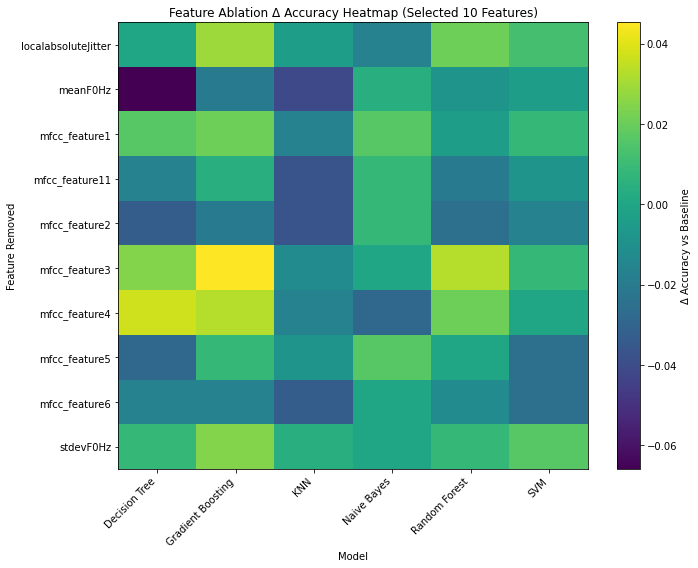

In [19]:
import matplotlib.pyplot as plt


wide_sel = ablation_selected.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)

plt.figure(figsize=(10, 8))
plt.imshow(wide_sel.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide_sel.columns)), wide_sel.columns, rotation=45, ha='right')
plt.yticks(range(len(wide_sel.index)), wide_sel.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap (Selected 10 Features)')
plt.tight_layout()
plt.show()

Top 10 worst Δ accuracy drops (model × feature):
            model feature_removed  avg_accuracy  delta_vs_base
    Decision Tree        meanF0Hz      0.707960      -0.054405
              KNN        meanF0Hz      0.789571      -0.049559
    Random Forest        meanF0Hz      0.809401      -0.035948
Gradient Boosting        meanF0Hz      0.793313      -0.034691
              SVM   mfcc_feature6      0.743877      -0.032160
              KNN   mfcc_feature5      0.814370      -0.024760
Gradient Boosting   mfcc_feature2      0.808205      -0.019799
              KNN  mfcc_feature11      0.820558      -0.018572
              KNN   mfcc_feature6      0.820589      -0.018542
              SVM   mfcc_feature4      0.758722      -0.017315


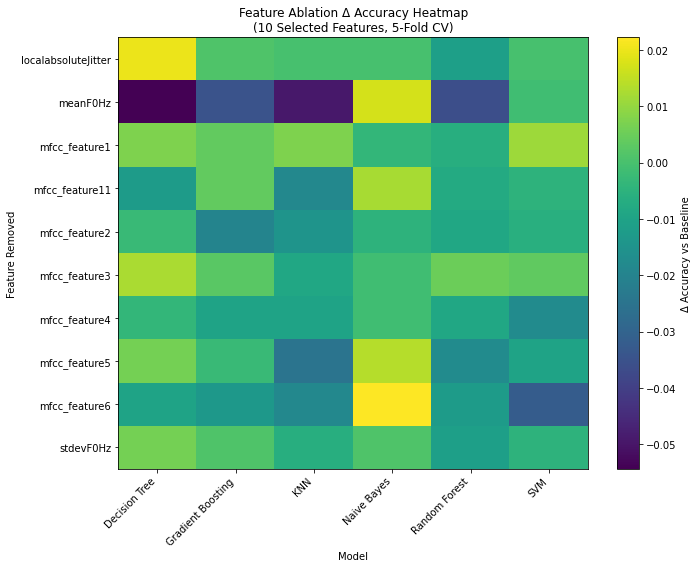

In [ ]:
## With 5 fold cross validation

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.svm           import SVC
from sklearn.tree          import DecisionTreeClassifier
from sklearn.naive_bayes   import GaussianNB
from sklearn.ensemble      import RandomForestClassifier, GradientBoostingClassifier

models = {
    'KNN':               KNeighborsClassifier(n_neighbors=10),
    'SVM':               SVC(),
    'Decision Tree':     DecisionTreeClassifier(),
    'Naive Bayes':       GaussianNB(),
    'Random Forest':     RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


X_all = df_selected.iloc[:, :-1]
y_all = df_selected.iloc[:,  -1]


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


records = []
for name, model in models.items():
    # baseline avg accuracy with all features
    base_acc = cross_val_score(model, X_all, y_all,
                               scoring='accuracy', cv=cv,
                               n_jobs=-1).mean()
    for feat in X_all.columns:
        # drop one feature
        X_drop = X_all.drop(columns=[feat])
        # avg accuracy without that feature
        acc = cross_val_score(model, X_drop, y_all,
                              scoring='accuracy', cv=cv,
                              n_jobs=-1).mean()
        records.append({
            'model':           name,
            'feature_removed': feat,
            'avg_accuracy':    acc,
            'delta_vs_base':   acc - base_acc
        })


ablation_df = pd.DataFrame(records)


print("Top 10 worst Δ accuracy drops (model × feature):")
print(ablation_df.sort_values('delta_vs_base').head(10).to_string(index=False))


wide = ablation_df.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)

plt.figure(figsize=(10, 8))
plt.imshow(wide.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide.columns)), wide.columns, rotation=45, ha='right')
plt.yticks(range(len(wide.index)), wide.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap\n(10 Selected Features, 5-Fold CV)')
plt.tight_layout()
plt.show()
